In [14]:
import numpy as np 
import matplotlib.pyplot as plt


In [19]:
mu, sigma = 0, 1 
k = 30
tries = 700
iterations = 1000
epsilons = [0,.1]
optimistic = [False,False]
ucbs = [True,False]
ucb_cs = [2,0]

<ipython-input-20-52439eb2500d>:27: RuntimeWarning: divide by zero encountered in log
  a = np.argmax(tries_info[j]["Q"] + c * (np.log(i)/tries_info[j]["decisions_history"])**.5)
<ipython-input-20-52439eb2500d>:27: RuntimeWarning: invalid value encountered in sqrt
  a = np.argmax(tries_info[j]["Q"] + c * (np.log(i)/tries_info[j]["decisions_history"])**.5)


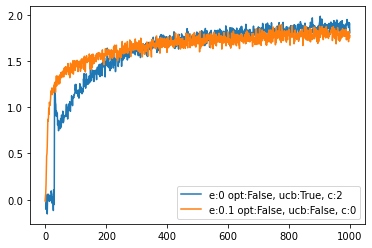

In [20]:
epsions_plots=[]

for epsilon, opt,ucb,c in zip(epsilons,optimistic,ucbs,ucb_cs):
    # Set up intial conditions
    tries_info = []
    for i in range(tries):
        tries_info.append(
            {
                "Q": np.ones(k)*5 if opt else np.random.normal(mu, sigma, k),# Initial optimistic Q 
                "sum_of_rewards_per_action": np.zeros(k),
                "decisions_history": np.zeros(k)+.01,
                "q": np.random.normal(mu, sigma, k)
            })
        
    # Run Larning Process
    mean_reward_history = []
    for i in range(iterations):
        
        mean_reward = 0
        for j in range(tries):
            
            # Decision of Action  
            if np.random.rand() < epsilon:
                a = np.random.randint(k)        
            else:
                if ucb :
                    a = np.argmax(tries_info[j]["Q"] + c * (np.log(i)/tries_info[j]["decisions_history"])**.5)
                    
                else:
                    a = np.argmax(tries_info[j]["Q"])

            # Q update
            reward = np.random.normal(tries_info[j]["q"][a], sigma, 1)[0]
            tries_info[j]["sum_of_rewards_per_action"][a] += reward
            tries_info[j]["decisions_history"][a] += 1
            tries_info[j]["Q"][a] = tries_info[j]["sum_of_rewards_per_action"][a] / tries_info[j]["decisions_history"][a]
            mean_reward += reward/tries
            
        mean_reward_history.append(mean_reward)
    plt.plot(mean_reward_history,label=f'e:{epsilon} opt:{opt}, ucb:{ucb}, c:{c}')
plt.legend()
plt.show()